In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SIZE = 25

In [8]:
def parse_condition(cond: str):
    """
    Convert a condition string (e.g., 'if (x > y)') into a Python lambda function.
    """
    expr = cond.strip()
    if expr.startswith("if"):
        expr = expr[2:].strip()
    if expr.startswith("(") and expr.endswith(")"):
        expr = expr[1:-1]

    # Replace Java/JS syntax with Python equivalents
    expr = expr.replace("&&", "and").replace("||", "or").replace("!", "not ")
    expr = expr.replace("Math.floor", "int")
    expr = expr.replace("Math.abs", "abs")
    expr = expr.replace("Math.sin", "np.sin")

    return eval(f"lambda x, y: {expr}")


In [17]:
def draw_spell(cond: str, title: str = "Spell"):
    """
    Draw a spell grid for a given condition string and plot it inline.
    """
    func = parse_condition(cond)
    grid = np.zeros((SIZE, SIZE), dtype=int)

    for x in range(SIZE):
        for y in range(SIZE):
            try:
                if func(x, y):
                    grid[y, x] = 1  # y is row, x is column
            except Exception:
                pass

    plt.figure(figsize=(3, 3))
    plt.imshow(grid, cmap="gray_r", interpolation="nearest")
    plt.title(title)
    plt.axis("off")
    plt.show()


In [18]:
squares_path = "./squares.txt"
conditions = []

with open(squares_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("СПОЙЛЕР") or line[0].isalpha():
            continue
        m = re.match(r"^\d+\.\s*(if.*)$", line)
        if m:
            conditions.append(m.group(1))



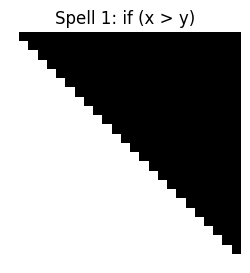

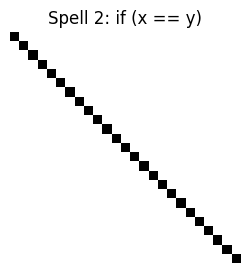

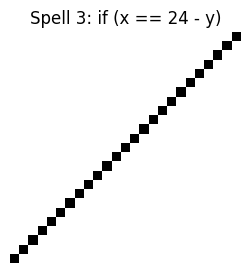

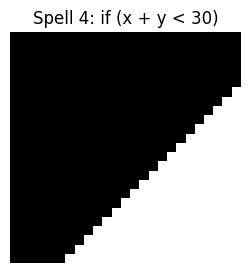

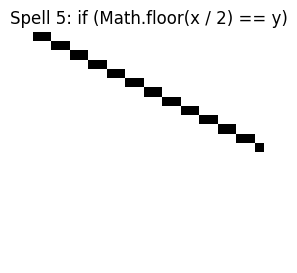

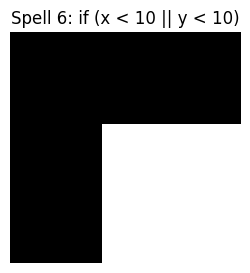

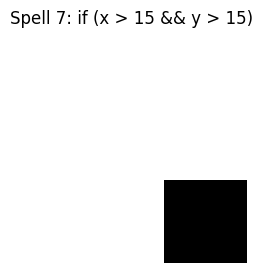

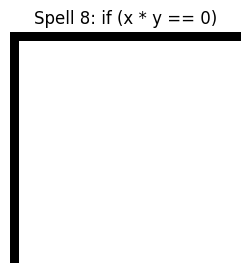

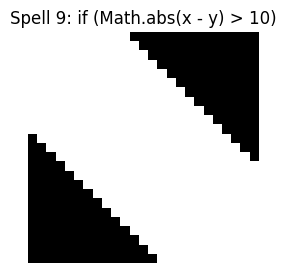

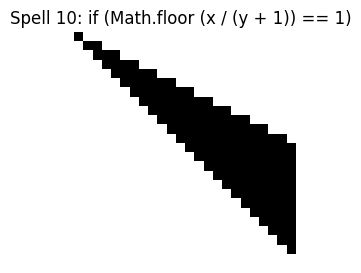

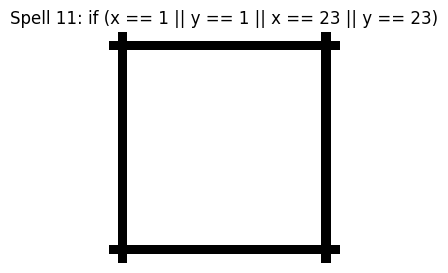

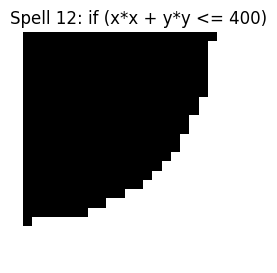

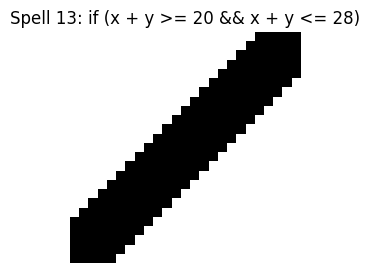

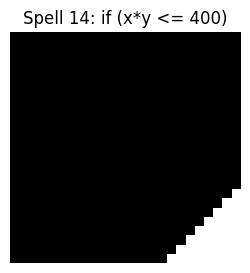

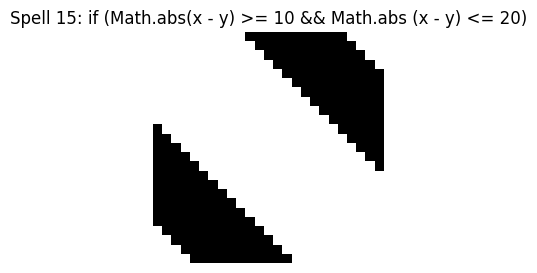

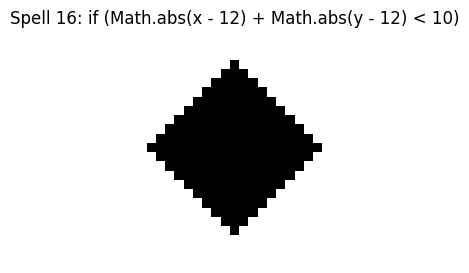

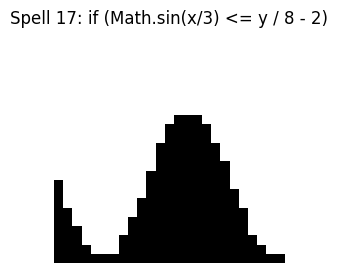

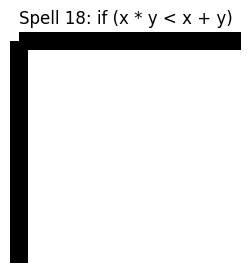

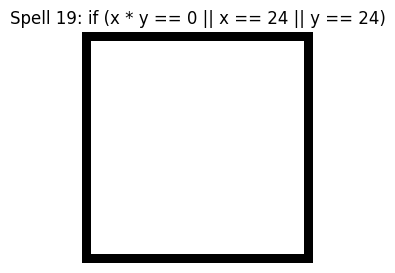

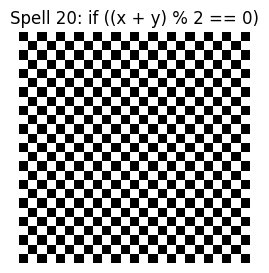

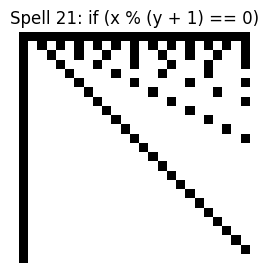

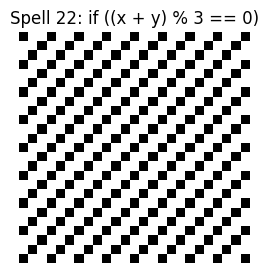

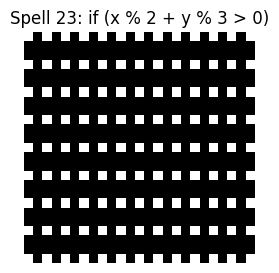

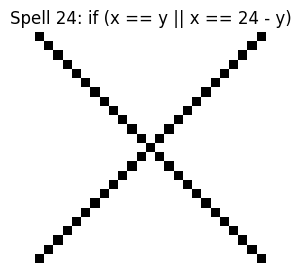

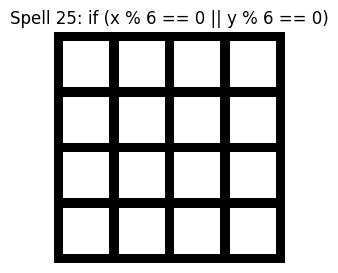

In [19]:
# Plot all spells inline in Jupyter
for i, cond in enumerate(conditions, 1):
    draw_spell(cond, f"Spell {i}: {cond}")
